In [1]:
!pip install statsmodels

In [2]:
!pip install --upgrade shap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr, pointbiserialr, chi2_contingency,ttest_ind, shapiro,kstest
warnings.filterwarnings("ignore")

In [2]:
models = {
    'decision_tree' : DecisionTreeClassifier(),
    'random_forest' : RandomForestClassifier(),
    'svc': SVC(),
    'logistic' : LogisticRegression(),
    'navies' :GaussianNB()
    
}

In [3]:
models_name = ['decision_tree','random_forest','svc','logistic','navies']

In [4]:
df = pd.read_csv('/Users/matheshanandan/Downloads/Academics/MI/Medicaldataset.csv')


In [5]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [6]:
df['Result'].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

<Axes: >

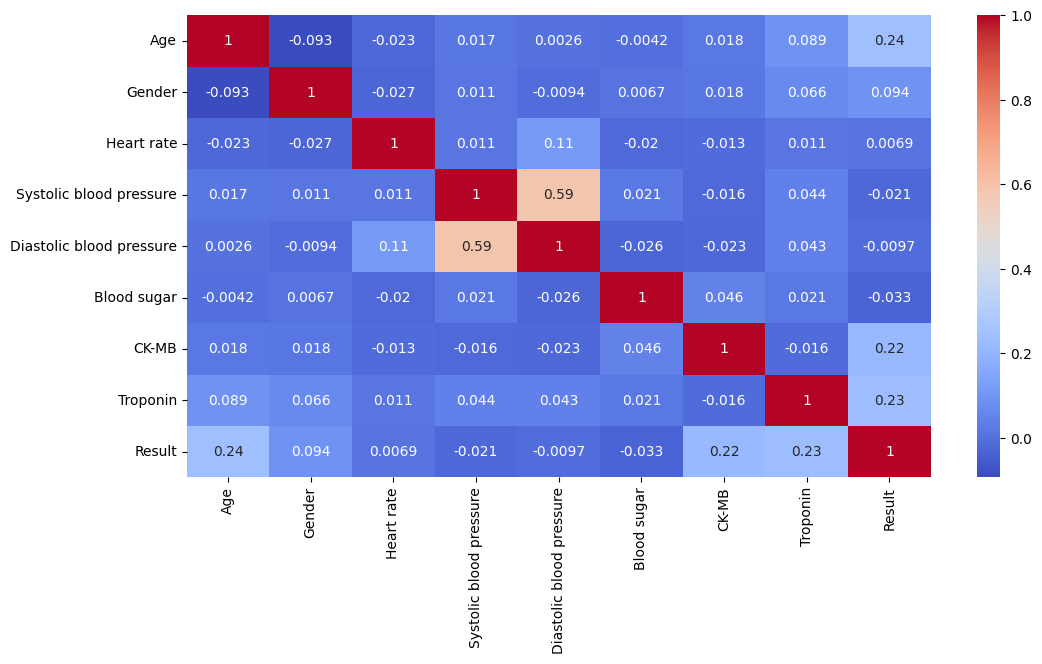

In [7]:
df['Result'] = df['Result'].replace({'positive': 1, 'negative':0})
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm')

In [9]:
import statsmodels.api as sm

# Troponin ~ Age
X_troponin = sm.add_constant(df['Age'])  # Add constant for intercept
y_troponin = df['Troponin']
model_troponin = sm.OLS(y_troponin, X_troponin).fit()
print(model_troponin.summary())

# CKMB ~ Age
X_ckmb = sm.add_constant(df['Age'])
y_ckmb = df['CK-MB']
model_ckmb = sm.OLS(y_ckmb, X_ckmb).fit()
print(model_ckmb.summary())


                            OLS Regression Results                            
Dep. Variable:               Troponin   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     10.47
Date:                Thu, 27 Feb 2025   Prob (F-statistic):            0.00124
Time:                        18:30:15   Log-Likelihood:                -2055.4
No. Observations:                1319   AIC:                             4115.
Df Residuals:                    1317   BIC:                             4125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0612      0.134     -0.456      0.6

In [10]:
X = df.drop('Result', axis=1)  # Replace 'Output' with your target column
y = df['Result']              # Replace with your target column
X = sm.add_constant(X)             # Adds the intercept term
results = sm.OLS(y, X).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     31.27
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           3.85e-45
Time:                        18:31:19   Log-Likelihood:                -806.79
No. Observations:                1319   AIC:                             1632.
Df Residuals:                    1310   BIC:                             1678.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [11]:
descriptive_statistics = df.drop(['Gender','Result'], axis =1).describe()

In [12]:
threshold = 2
categorical_column = [col for col in df.columns if df[col].nunique()<=threshold]
continous_column = [col for col in df.columns if df[col].nunique()>threshold]
print(categorical_column)
print(continous_column)
df[continous_column[len(continous_column)-1]]

['Gender', 'Result']
['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']


0       0.012
1       1.060
2       0.003
3       0.122
4       0.003
        ...  
1314    0.006
1315    0.172
1316    4.250
1317    0.359
1318    1.770
Name: Troponin, Length: 1319, dtype: float64

In [13]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


<Axes: xlabel='Troponin', ylabel='Density'>

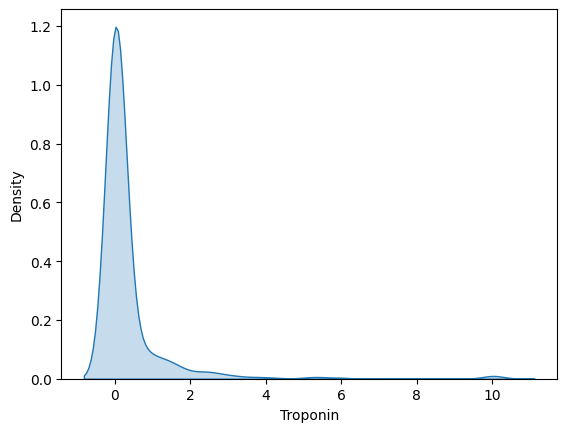

In [14]:
sns.kdeplot(df['Troponin'], shade = True)

In [15]:
def significance_check(df):
    data = {
        'Features':[],
        'Test Statistics':[],
        'P Value':[]
    }
    columns = df.columns.tolist()
    without_mi = df[df['Result']==0.0]
    with_mi = df[df['Result']==1.0]
    for i in columns:
        stat, p_value = ttest_ind(with_mi[i], without_mi[i], equal_var=False)
        if p_value <0.05:
            data['Features'].append(i)
            data['P Value'].append('<0.05')
            data['Test Statistics'].append(np.round(stat,2))
        else:
            data['Features'].append(i)
            data['P Value'].append(p_value)
            data['Test Statistics'].append(np.round(stat,2))
    data_df = pd.DataFrame(data)
    return data_df
        

In [16]:
significance_check(df)

,Features,Test Statistics,P Value
0,Age,8.78,<0.05
1,Gender,3.39,<0.05
2,Heart rate,0.26,0.796926
3,Systolic blood pressure,-0.75,0.455748
4,Diastolic blood pressure,-0.35,0.727994
5,Blood sugar,-1.18,0.238422
6,CK-MB,10.21,<0.05
7,Troponin,10.33,<0.05
8,Result,inf,<0.05


In [17]:
def corr_with_p_value(df):
    a =1
    columns = df.columns.tolist()
    stats = {
        'Feature':[],
        'Correlation':[],
        'P Value':[]
    }
    threshold = 2
    categorical_column = [col for col in df.columns if df[col].nunique()<=threshold]
    continous_column = [col for col in df.columns if df[col].nunique()>threshold]
    
    for i in range(len(continous_column)):
        
        columns_name =continous_column[i]
        
        corr, p_value = pearsonr(df[continous_column[i]], df[continous_column[len(continous_column) -7]])
        
        stats['Feature'].append(columns_name)
        stats['Correlation'].append(corr)
        stats['P Value'].append(p_value)
        
    stats_df = pd.DataFrame(stats)
    
    return stats_df
    

In [18]:
corr_with_p_value(df)

,Feature,Correlation,P Value
0,Age,1.000000,0.000000
1,Heart rate,-0.023440,0.394992
2,Systolic blood pressure,0.017441,0.526829
3,Diastolic blood pressure,0.002614,0.924431
4,Blood sugar,-0.004193,0.879079
5,CK-MB,0.018419,0.503907
6,Troponin,0.088800,0.001245


In [19]:
from scipy.stats import pointbiserialr

def point_biserial(df, continous_columns,categorical_column):
    result = {
        'Feature':[],
        'Correlation':[],
        'P Value':[]
    }
    for column in continous_columns:
        corr, p_value = pointbiserialr(df[column], df[categorical_column])
        result['Feature'].append(column)
        result['Correlation'].append(corr)
        result['P Value'].append(p_value)
    result_df = pd.DataFrame(result)
    return result_df

def chi2_statistics(df,categorical_columns,fixed_categorical_column):

    result = {
        'Feature':[],
        'Chi2':[],
        'P value':[],
        'Degrees of freedom':[]
    }

    for col in categorical_columns:
        column_name = col
        contingency_table = pd.crosstab(df[col], df[fixed_categorical_column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        result['Feature'].append(col)
        result['Chi2'].append(chi2)
        result['P value'].append(p)
        result['Degrees of freedom'].append(dof)
    result_df = pd.DataFrame(result)
    return result_df


In [ ]:
df

In [25]:
df['Gender'].value_counts()

Gender
1    870
0    449
Name: count, dtype: int64

In [20]:
con_values = point_biserial(df,continous_column, 'Result')

In [21]:
cat_values = chi2_statistics(df,categorical_column, 'Result' )

In [22]:
cat_values

,Feature,Chi2,P value,Degrees of freedom
0,Gender,11.356315,7.519186e-04,1
1,Result,1314.783624,6.927025e-288,1


In [23]:
con_values

,Feature,Correlation,P Value
0,Age,0.238097,1.861645e-18
1,Heart rate,0.006920,8.017343e-01
2,Systolic blood pressure,-0.020825,4.498359e-01
3,Diastolic blood pressure,-0.009659,7.259839e-01
4,Blood sugar,-0.033059,2.302000e-01
5,CK-MB,0.217720,1.287762e-15
6,Troponin,0.229376,3.303209e-17


In [58]:
inci_mi = {
    'Age Group':[],
    # 'Total Population':[],
    # 'Count of people with MI':[],
    # 'Percentage of people with MI':[],
    'Troponin Mean':[],
    'Creatinine kinase-MB Mean':[],
    'Systolic BP Mean':[],
    'Diastolic BP Mean':[],
    'Glucose Mean':[],
    'Heart Rate Mean':[]
    
}
for i in range(10,120,10):
    age = f'{i}-{i+10}'
    filtered_df = df[(df['Age'] >= i) & (df['Age'] <= i+10)]
    count_output = filtered_df['Result'].value_counts()
    kcm_mean = np.round(filtered_df['CK-MB'].mean(),3)
    kcm_std = np.round(filtered_df['CK-MB'].std(),3)
    troponin_mean = np.round(filtered_df['Troponin'].mean(),3)
    troponin_std = np.round(filtered_df['Troponin'].std(),3)
    sys_mean = np.round(filtered_df['Systolic blood pressure'].mean(),3)
    sys_std = np.round(filtered_df['Systolic blood pressure'].std(),3)
    dia_mean = np.round(filtered_df['Diastolic blood pressure'].mean(),3)
    dia_std = np.round(filtered_df['Diastolic blood pressure'].std(),3)
    glu_mean = np.round(filtered_df['Blood sugar'].mean(),3)
    glu_std = np.round(filtered_df['Blood sugar'].std(),3)
    hr_mean = np.round(filtered_df['Heart rate'].mean(),3)
    hr_std = np.round(filtered_df['Heart rate'].std(),3)
    total_count = len(filtered_df)
    
    count_with_mi = count_output.get(1,0)
    count_without_mi = count_output.get(0,0)

    percent_mi = f'{np.round(count_with_mi/total_count *100 if total_count > 0 else 0,2)}%'
    percent_without_mi = f'{np.round(count_without_mi/total_count *100 if total_count > 0 else 0,2)}%'

    inci_mi['Age Group'].append(age)
    # inci_mi['Total Population'].append(total_count)
    # inci_mi['Count of people with MI'].append(count_with_mi)
    # inci_mi['Percentage of people with MI'].append(percent_mi)
    inci_mi['Troponin Mean'].append(f'{troponin_mean} ± {troponin_std}')
    inci_mi['Creatinine kinase-MB Mean'].append(f'{kcm_mean} ± {kcm_std}')
    inci_mi['Glucose Mean'].append(f'{glu_mean} ± {glu_std}')
    inci_mi['Systolic BP Mean'].append(f'{sys_mean} ± {sys_std}')
    inci_mi['Diastolic BP Mean'].append(f'{dia_mean} ± {dia_std}')
    inci_mi['Heart Rate Mean'].append(f'{hr_mean} ± {hr_std}')

incidence_of_mi = pd.DataFrame(inci_mi)
incidence_of_mi

,Age Group,Troponin Mean,Creatinine kinase-MB Mean,Systolic BP Mean,Diastolic BP Mean,Glucose Mean,Heart Rate Mean
0,10-20,0.315 ± 0.747,57.964 ± 119.33,120.5 ± 17.649,67.5 ± 7.556,160.0 ± 85.809,71.167 ± 10.815
1,20-30,0.077 ± 0.292,19.675 ± 58.033,129.421 ± 33.396,71.439 ± 17.143,147.825 ± 86.372,77.263 ± 15.099
2,30-40,0.068 ± 0.265,18.049 ± 52.86,124.398 ± 26.261,71.089 ± 12.74,142.919 ± 62.848,83.39 ± 94.499
3,40-50,0.312 ± 0.904,12.319 ± 34.839,126.706 ± 26.539,72.712 ± 14.836,143.351 ± 69.701,80.137 ± 61.598
4,50-60,0.41 ± 1.134,12.866 ± 38.944,127.306 ± 25.503,72.576 ± 13.494,153.774 ± 79.521,75.6 ± 14.345
5,60-70,0.496 ± 1.482,17.49 ± 52.313,128.009 ± 26.447,72.512 ± 14.114,147.304 ± 80.281,78.678 ± 51.111
6,70-80,0.45 ± 1.269,12.919 ± 45.322,126.29 ± 24.581,71.657 ± 14.066,142.0 ± 71.142,81.841 ± 73.484
7,80-90,0.306 ± 0.738,32.586 ± 70.961,127.429 ± 23.779,71.829 ± 14.296,141.257 ± 73.219,74.171 ± 16.82
8,90-100,0.538 ± 0.796,5.654 ± 0.375,135.8 ± 53.932,66.4 ± 9.685,223.2 ± 145.139,76.4 ± 28.658
9,100-110,0.314 ± 0.455,42.313 ± 32.908,175.333 ± 31.723,74.333 ± 18.009,199.667 ± 113.006,67.333 ± 16.289


<Axes: ylabel='Count'>

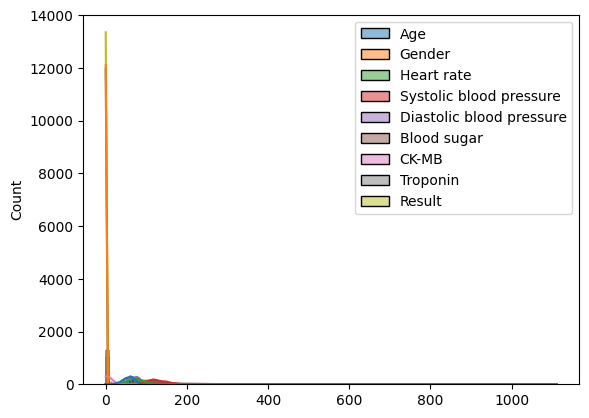

In [32]:
sns.histplot(data = df,kde = True)

In [34]:
inci_mi = {
    'Age Group':[],
    'Total Population':[],
    '% of total population':[],
    'Count of people with MI':[],
    'Count of people without MI':[],
    'Percentage of people with MI':[],
    'Percentage of people without MI':[]
    
}
for i in range(10,120,10):
    age = f'{i}-{i+10}'
    filtered_df = df[(df['Age'] >= i) & (df['Age'] <= i+10)]
    count = filtered_df['Result'].value_counts()
    total_count = len(filtered_df)
    
    count_with_mi = count.get(1,0)
    count_without_mi = count.get(0,0)
    total_per = np.round(total_count/1318 *100,2)

    percent_mi = f'{np.round(count_with_mi/1318 *100 if total_count > 0 else 0,2)}%'
    percent_without_mi = f'{np.round(count_without_mi/1318 *100 if total_count > 0 else 0,2)}%'

    inci_mi['Age Group'].append(age)
    inci_mi['Total Population'].append(total_count)
    inci_mi['% of total population'].append(total_per)
    inci_mi['Count of people with MI'].append(count_with_mi)
    inci_mi['Count of people without MI'].append(count_without_mi)
    inci_mi['Percentage of people with MI'].append(percent_mi)
    inci_mi['Percentage of people without MI'].append(percent_without_mi)

incidence_of_mi = pd.DataFrame(inci_mi)

incidence_of_mi
    

,Age Group,Total Population,% of total population,Count of people with MI,Count of people without MI,Percentage of people with MI,Percentage of people without MI
0,10-20,6,0.46,3,3,0.23%,0.23%
1,20-30,57,4.32,23,34,1.75%,2.58%
2,30-40,123,9.33,50,73,3.79%,5.54%
3,40-50,299,22.69,152,147,11.53%,11.15%
4,50-60,422,32.02,273,149,20.71%,11.31%
5,60-70,457,34.67,316,141,23.98%,10.7%
6,70-80,207,15.71,159,48,12.06%,3.64%
7,80-90,35,2.66,28,7,2.12%,0.53%
8,90-100,5,0.38,3,2,0.23%,0.15%
9,100-110,3,0.23,3,0,0.23%,0.0%


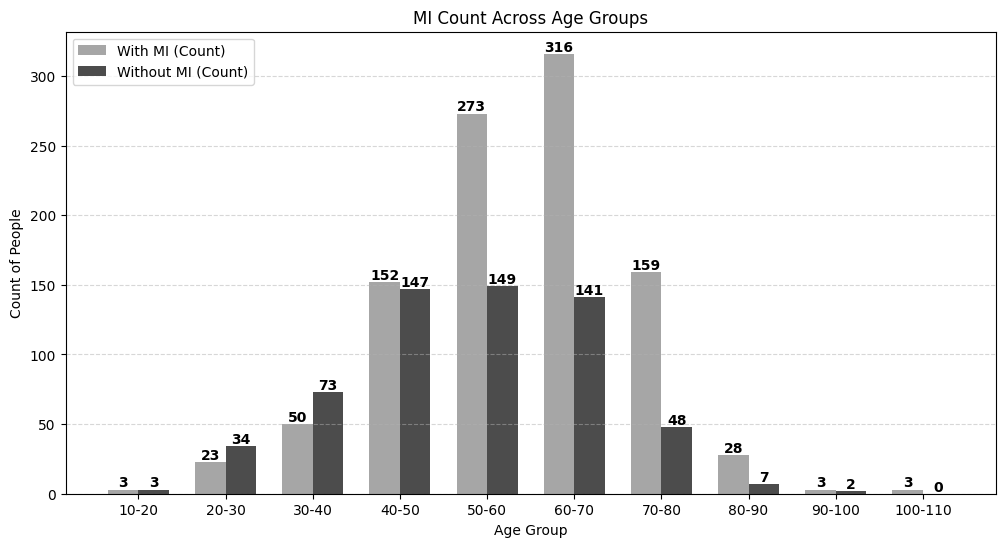

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Data
age_groups = ["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "100-110"]
total_population = np.array([6, 57, 123, 299, 422, 457, 207, 35, 5, 3])
mi_count = np.array([3, 23, 50, 152, 273, 316, 159, 28, 3, 3])
no_mi_count = np.array([3, 34, 73, 147, 149, 141, 48, 7, 2, 0])

# Compute percentages
mi_percent = (mi_count / total_population) * 100
no_mi_percent = (no_mi_count / total_population) * 100

# Bar plot positions
x = np.arange(len(age_groups))  # Age group positions
bar_width = 0.35  # Width of bars

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot count bars
bars1 = ax1.bar(x - bar_width/2, mi_count, bar_width, label="With MI (Count)", color='gray', alpha=0.7)
bars2 = ax1.bar(x + bar_width/2, no_mi_count, bar_width, label="Without MI (Count)", color='black', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{int(bar.get_height())}', ha='center', fontsize=10, fontweight='bold')

for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{int(bar.get_height())}', ha='center', fontsize=10, fontweight='bold')

# Labels and formatting
ax1.set_ylabel("Count of People")
ax1.set_xlabel("Age Group")
ax1.set_xticks(x)
ax1.set_xticklabels(age_groups)
ax1.legend(loc='upper left')

# Title
plt.title("MI Count Across Age Groups")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()



In [ ]:
px.histogram(data_frame = df,
          x = 'Age',
          y = 'Output',
          marginal='box',
          width = 600,
          height = 500,
          
          )

In [ ]:
x_values= ['Male', 'Female']
y_values = [146.993103,145.939198]
fig = px.bar(
    x=x_values, 
    y=y_values,
    text = y_values,
    title="Glucose Vs Gender",
    width = 600,
    height =500,
    template="plotly_white"
    
)
fig.update_xaxes(showticklabels=True)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

In [ ]:
fig = px.scatter(
    data_frame = df,
    x = 'Heart Rate',
    y = 'Pressure High',
    title = 'Scatterplot of Heart Rate Vs Systolic BP',
    width = 800,
    height =600
)
fig.show()

In [ ]:
df.groupby('Gender')['Glucose'].mean()

In [ ]:

px.box(data_frame = df, y = ['Age', 'Heart Rate', 'Pressure High', 'Pressure Low',
       'Glucose', 'KCM', 'Troponin'], title = 'Box plot for all continous variables',width = 1000, height =600)

In [ ]:
df

In [ ]:
val = np.array(df['KCM'].sort_values(ascending =False))

In [ ]:
df['Output'].value_counts()

In [ ]:
val[59]

In [ ]:
result_final = []

In [ ]:
df

In [60]:
X = df.drop('Result', axis =1).values
y = df['Result'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
con_matrix_1 = {
    'Model name': [],
    'Percentage of True Positive': [],
    'Percentage of True Negative': [],
    'Percentage of False Positive': [],
    'Percentage of False Negative': []
}

for i in range(len(models_name)):
    classifier = models[models_name[i]]
    classifier.fit(X_train, y_train)
    print(f'Training on {models_name[i]}...')
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) *100
    # result_final.append(accuracy)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Accuracy of {models_name[i]} = {accuracy}')
    print(f"Cross-validation scores:\n{cv_scores}")
    print("Mean accuracy:", cv_scores.mean())
    print("Standard deviation:", cv_scores.std())
    auc = roc_auc_score(y_test, y_pred)
    print(f"AUC: {auc}")
    confusion = confusion_matrix(y_test, y_pred)
    con_matrix_1['Model name'].append(models_name[i])  # Use model_name (string) for readability
    con_matrix_1['Percentage of True Positive'].append(f'{np.round(confusion[0, 0]*100/330,2)}%')
    con_matrix_1['Percentage of True Negative'].append(f'{np.round(confusion[1, 1]*100/330,2)}%')
    con_matrix_1['Percentage of False Positive'].append(f'{np.round(confusion[0, 1]*100/330,2)}%')
    con_matrix_1['Percentage of False Negative'].append(f'{np.round(confusion[1, 0]*100/330,2)}%')
    print(classification_report(y_test, y_pred))
    print(confusion)
    print(f'\n')
    print(f'\n')
    
    


Training on decision_tree...
Accuracy of decision_tree = 97.57575757575758
Cross-validation scores:
[0.99494949 0.99494949 0.98989899 0.99494949 1.        ]
Mean accuracy: 0.9949494949494948
Standard deviation: 0.0031942198587559243
AUC: 0.9730430074257426
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330

[[123   5]
 [  3 199]]




Training on random_forest...
Accuracy of random_forest = 97.57575757575758
Cross-validation scores:
[0.99494949 0.97979798 0.97979798 1.         0.98984772]
Mean accuracy: 0.988878634056299
Standard deviation: 0.008079552156629978
AUC: 0.9730430074257426
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.98  

In [61]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.5 MB/s eta 0:00:00a 0:00:01


In [62]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.5 MB/s eta 0:00:0000:0100:01


In [63]:
!pip install catboost

  Using cached catboost-1.2.7-cp312-cp312-macosx_11_0_universal2.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.7-cp312-cp312-macosx_11_0_universal2.whl (27.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 3.6 MB/s eta 0:00:0000:0100:01
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


In [65]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Creating instances of models
boosting_models_dict = {
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        use_label_encoder=False
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=3,
        random_seed=42,
        verbose=0
    )
}


In [66]:
boosting_models_list = list(boosting_models_dict.values())

In [67]:
con_matrix = {
    'Model name':[],
    'Percentage of True Positive':[],
    'Percentage of True Negative':[],
    'Percentage of False Positive':[],
    'Percentage of False Negative':[]
}


In [68]:
con_matrix

{'Model name': [],
 'Percentage of True Positive': [],
 'Percentage of True Negative': [],
 'Percentage of False Positive': [],
 'Percentage of False Negative': []}

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the results dictionary
con_matrix = {
    'Model name': [],
    'Percentage of True Positive': [],
    'Percentage of True Negative': [],
    'Percentage of False Positive': [],
    'Percentage of False Negative': []
}

for model_name, model in boosting_models_dict.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for AUC calculation

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Append results to the dictionary
    con_matrix['Model name'].append(model_name)  # Use model_name (string) for readability
    con_matrix['Percentage of True Positive'].append(f'{np.round(confusion[0, 0]*100/330,2)}%')
    con_matrix['Percentage of True Negative'].append(f'{np.round(confusion[1, 1]*100/330,2)}%')
    con_matrix['Percentage of False Positive'].append(f'{np.round(confusion[0, 1]*100/330,2)}%')
    con_matrix['Percentage of False Negative'].append(f'{np.round(confusion[1, 0]*100/330,2)}%')

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(report)
    print(f"AUC: {auc:.2f}")

# Convert to a DataFrame for better visualization
import pandas as pd

con_matrix_df = pd.DataFrame(con_matrix)




Model: Gradient Boosting
Accuracy: 0.98
Confusion Matrix:
[[122   6]
 [  2 200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       128
           1       0.97      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330

AUC: 0.98
Model: XGBoost
Accuracy: 0.98
Confusion Matrix:
[[123   5]
 [  2 200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

AUC: 0.98
[LightGBM] [Info] Number of positive: 608, number of negative: 381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the

In [70]:
results = [0.97,0.98,0.60,0.74,0.90,0.98,0.98,0.98,0.98]
models = ['Decision_tree','Random_Forest','SVC','Logistic Regression','Naive Bayes','Gradient Boost','XGBoost','Lightbm','Cat Boost']

In [72]:
fig = px.bar(
    y=results, 
    x=models,
    text = results,
    title="Models Area under the Curve in Predicting MI ",
    width = 600,
    height =500,
    template="plotly_white"
    
)
fig.update_xaxes(showticklabels=True)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

NameError: name 'px' is not defined

In [73]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
y_pred = model.predict(X_test)
probabilities_test = model.predict_proba(X_test)

In [75]:
print(accuracy_score(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)
print(classification_report(y_pred, y_test))
print(cm)

0.9757575757575757
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       126
           1       0.99      0.98      0.98       204

    accuracy                           0.98       330
   macro avg       0.97      0.98      0.97       330
weighted avg       0.98      0.98      0.98       330

[[123   3]
 [  5 199]]


In [76]:
cm[1,1]

199

In [79]:
X_test_df = pd.DataFrame(X_test, columns = df.drop('Result', axis = 1).columns)

In [80]:
prob_X_test = pd.DataFrame(probabilities_test, columns = ['Probability of No MI', 'Probability of MI'])

In [81]:
X_test_prob = pd.concat([X_test_df, prob_X_test], axis =1)

In [ ]:
X_test_prob.to_csv('Predicted Probabilities.csv')

In [83]:
df_columns = df.drop('Result', axis =1).columns

In [84]:
X_train_df = pd.DataFrame(X_train, columns = df_columns)

In [85]:
X_test_df = pd.DataFrame(X_test, columns = df_columns)

In [87]:
import shap

In [88]:
explainer = shap.Explainer(model, X_train_df)

In [89]:
shap_values = explainer(X_test_df,check_additivity=False)

In [91]:
df_columns = df.drop('Result', axis =1).columns

In [92]:
df_columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin'],
      dtype='object')

In [93]:
shap_values_class_1 = shap_values[:,:,1]
shap_values_class_0 = shap_values[:,:,0]

In [94]:
## shap.summary_plot(shap_values[:,:,1], X_test_df, feature_names=df_columns)


In [96]:
df.groupby('Result')['Troponin'].mean()

Result
0    0.026988
1    0.570798
Name: Troponin, dtype: float64

In [178]:
X_test_df[242:243]

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
242,66.0,1.0,68.0,91.0,61.0,111.0,2.22,0.015


Model prediction for sample 20: [1]


In [127]:
df['CK-MB'].describe()

count    1319.000000
mean       15.274306
std        46.327083
min         0.321000
25%         1.655000
50%         2.850000
75%         5.805000
max       300.000000
Name: CK-MB, dtype: float64

In [179]:
index = 242
print(f"Model prediction for sample {index}:", model.predict(X_test[index].reshape(1, -1)))

shap.initjs()
shap.force_plot(
        explainer.expected_value[1],  
        shap_values_class_1.values[index],    
        X_test[index],                   
        feature_names=df_columns)

Model prediction for sample 242: [1]


In [180]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[0],  # SHAP base value for class 1
    shap_values_class_0[index].values,    # SHAP values for the first sample, class 1
    X_test[index],                   # Feature values for the first sample
    feature_names=df_columns)

In [ ]:

model.predict([X_test[index]])

In [ ]:
shap.plots.force(shap_values_class_1)

In [ ]:
print(shap_values_class_0.shape)
print(X_test_df.shape)

In [ ]:
shap.summary_plot(shap_values_class_1, X_test, plot_type="layered_violin", color='coolwarm')

In [ ]:
for name in X_test_df.columns:
    shap.dependence_plot(name, shap_values_class_1.values, X_test_df)

In [ ]:
shap.dependence_plot(
    "KCM",  # Feature of interest
    shap_values_class_0.values,  # SHAP values for the model
    X_test_df,  # Original data to visualize feature values
    interaction_index="Troponin"  # Automatically chooses the most correlated feature for coloring
)

In [ ]:
shap.summary_plot(shap_values_class_0, X_test_df, plot_type="bar")

In [ ]:
shap.waterfall_plot(shap.Explanation(shap_values_class_0[300], 
                                     explainer.expected_value[0], 
                                     X_test[300], 
                                     df.columns))